# Decision Tree

## Objectives:
* Learn the concept of a decision tree
* Build your own decision tree, see if you can beat your logistic regression score
* Use sklearn.tree.DecisionTreeClassifier for modelling
* Visualise a decision tree in graphviz

Our first white box model! It's Boolean! It's Binary!

---

### Build your own Decision Tree

In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('train.csv', index_col=0)

In [25]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Going to write a series of `if/else` statements to work out the odds of survival of a passenger, i.e. a series of booleans .

For each question I'm going to ask about that row, and **after all decisions, add a 1 or 0 for each passenger to the list ypred.**

#### df.iterrows is a way of interating through the rows.


In [4]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
y = df['Survived']
ypred = []

# print(i) prints the index
# print(row) prints series on info in the row
for i, row in df.iterrows():
    # if row['??'] == ??: #put in column and then a value for that column!
    if row['Sex'] == 'male':
        ypred.append(0)
    else:
        ypred.append(1)

In [6]:
len(ypred)

891

In [7]:
print(f'Accuracy score: {accuracy_score(y,ypred)}')

Accuracy score: 0.7867564534231201


### That's a pretty good baseline accuracy for just one condition!

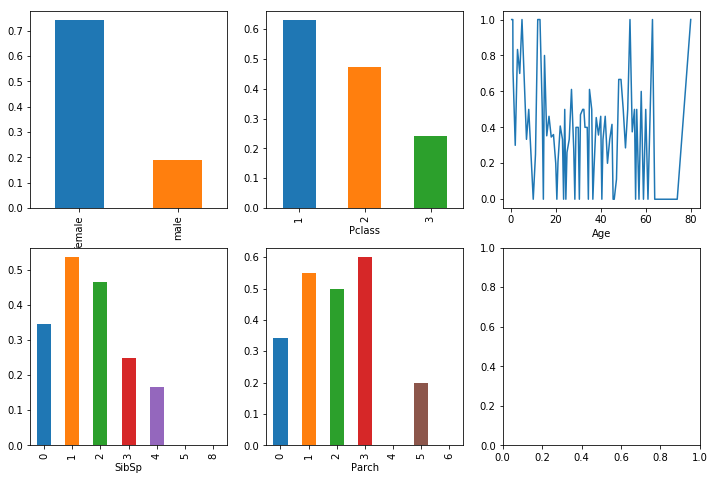

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

df.groupby(['Sex'])['Survived'].mean().plot.bar(ax=axes[0,0])
df.groupby(['Pclass'])['Survived'].mean().plot.bar(ax=axes[0,1])
df.groupby(['Age'])['Survived'].mean().plot(ax=axes[0,2])
df.groupby(['SibSp'])['Survived'].mean().plot.bar(ax=axes[1,0])
df.groupby(['Parch'])['Survived'].mean().plot.bar(ax=axes[1,1])
plt.show()

In [13]:
y = df['Survived']
ypred = []

for i, row in df.iterrows():

    if row['Sex'] == 'male':
        if row['Age'] < 14:
            if row['Pclass'] == 3:
                ypred.append(1)
            else:
                ypred.append(0)
        else: 
            ypred.append(0)
    else:
        ypred.append(0)

In [14]:
accuracy_score(y,ypred)

0.6083052749719416

In [15]:
y = df['Survived']
ypred = []

for i, row in df.iterrows():

    if row['Sex'] == 'male':
#         ypred.append(1)
#     else:
#         ypred.append(0)
        if row['Pclass'] == 3:
#             ypred.append(1)
#         else:
#             ypred.append(0)
            if row['Age'] > 16 or row['Age'] < 60:               
                ypred.append(1)
            else:
                ypred.append(0)
        else: 
            ypred.append(0)
    else:
        ypred.append(0)

In [16]:
# Chance of surviving if you are 3rd class, between 16 and 60 and male:
accuracy_score(y,ypred)

0.4175084175084175

--- 

### DecisionTreeClassifier in Scikit-learn

Train and fine-tune a Decision Tree models on the Titanic dataset.

`from sklearn.tree import DecisionTreeClassifier` 
- split the dataset into a training set and a test set using train_test_split()
- create and fit the model
- measure the training and test accuracy
- see whether the model is overfitting


In [17]:
# List comprehension syntax: [x for x in list]
# List comprehension: 
[1 if x == 'male' else 0 for x in df['Sex']][:25]

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# we reshape our X data into a matrix because sklearn requires it!
X = np.array([1 if x == 'male' else 0 for x in df['Sex']]).reshape(-1,1)  
        # Needs to be a matrix!
        # -1 means handle data length (could put 891 instead) 
        # 1 means added 2nd dimension
y = df['Survived']       

m = DecisionTreeClassifier()
m.fit(X,y)          # need to define X and y to run the model
m.score(X,y)

0.7867564534231201

---

### Visualise the results using Graphviz

In [19]:
import graphviz
import os
from sklearn.tree import export_graphviz

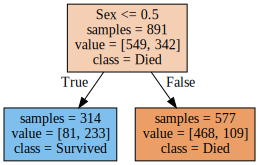

In [20]:
tree = export_graphviz(m,
                      class_names=['Died', 'Survived'],
                      feature_names=['Sex'],
                      impurity = False, #shows impurity (gini) at each node
                      filled=True) 
                      #tells you what decisions taken at each node

graph = graphviz.Source(tree)
graph.render('titanic')
graph

We've got something that looks a lot like the first two layers of our tree!

- First line is the question we've asked: Sex <= 0.5 asking is sex 0 or 1, i.e. male or female.
- Sample size is how many rows in our data set we passed in i.e. 314 survived, 577 died.
- Value is how they are split by sex e.g. 81 men and 233 women survived, 468 men and 109 women died.
- Class - what class is this section concerned with? Concerned with did people die or survive.

### Decision trees

Why are they good?

- Easy to understand
- fast to fit
- they are white-box: we can build our own

Why are they bad?

- They tend to overfit
- non-configurable (true of every ML model)

In [21]:
from sklearn.datasets import make_moons

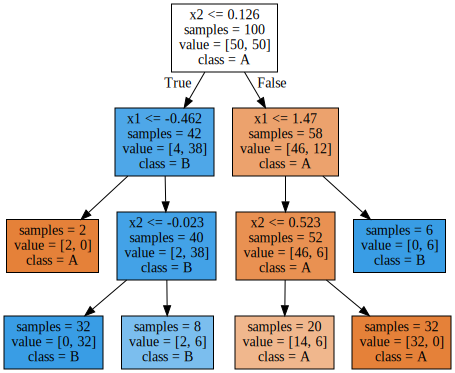

In [22]:
x, y = make_moons()

m = DecisionTreeClassifier(max_depth=3)
m.fit(x, y)

# create string in .dot format
tree = export_graphviz(m, out_file=None,
                       class_names=["A", "B"],
                       feature_names=['x1', 'x2'],
                       impurity=False,
                       filled=True)

graph = graphviz.Source(tree)
graph.render('moons')  # creates PDF
graph  # in Jupyter